# 3장. 2차원 데이터 정리

## 1. 두 데이터 사이의 관계를 나타내는 지표

### 1.1 공분산 (Covariance)
두 변수 사이의 선형 관계를 나타내는 지표입니다.
- $s_{xy} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$
- 양의 값이면 양의 상관관계, 음의 값이면 음의 상관관계를 의미합니다.

### 1.2 상관계수 (Correlation Coefficient)
공분산을 각 변수의 표준편차로 나누어 정규화한 값입니다. (-1 ≤ r ≤ 1)
- $r_{xy} = \frac{s_{xy}}{s_x s_y}$
- 1에 가까울수록 강한 양의 상관관계, -1에 가까울수록 강한 음의 상관관계를 나타냅니다.

## 2. 시각화 및 분석

### 2.1 산점도 (Scatter Plot)
두 변수의 관계를 좌표평면 상의 점으로 시각화하여 데이터의 분포와 경향성을 파악합니다.

### 2.2 회귀 직선 (Regression Line)
데이터의 경향성을 가장 잘 설명하는 직선을 구합니다.
- $y = \beta_0 + \beta_1 x$
- 최소제곱법(OLS)을 사용하여 잔차 제곱합을 최소화하는 계수를 찾습니다.

In [1]:
import numpy as np
import pandas as pd
%precision 3
pd.set_option('display.float_format','{:,.3f}'.format)

In [2]:
df = pd.read_csv('scores_em.csv', index_col='student number')

In [4]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]
scores_df = pd.DataFrame(
    {'english':en_scores, 'mathematics':ma_scores},
    index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='student')
)
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [ ]:
# 기존 데이터프레임을 복사하여 새로운 데이터프레임 생성
summary_df = scores_df.copy()

# 영어 점수의 편차(각 점수 - 평균) 계산
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()

# 수학 점수의 편차(각 점수 - 평균) 계산

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.000,-6.400,83.200
B,69,80,14.000,8.600,120.400
C,56,63,1.000,-8.400,-8.400
D,41,63,-14.000,-8.400,117.600
E,57,76,2.000,4.600,9.200
F,48,60,-7.000,-11.400,79.800
G,65,81,10.000,9.600,96.000
H,49,66,-6.000,-5.400,32.400
I,65,78,10.000,6.600,66.000


In [6]:
summary_df['product of deviations'].mean()

62.800

In [15]:
# ddof (Delta Degrees of Freedom) 상세 설명:
# 1. ddof=0 (모분산/모공분산): 전체 데이터를 알고 있을 때 사용하며, 편차 제곱의 합을 데이터 개수 n으로 나눕니다.
# 2. ddof=1 (표본분산/표본공분산): 모집단의 일부인 표본만 알고 있을 때 사용하며, n-1로 나눕니다. 
#    n-1로 나누는 이유는 표본 평균을 사용함에 따라 자유도가 1 감소하는 것을 보정하여 모집단의 분산을 더 정확하게 추정(불편 추정량)하기 위함입니다.
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [11]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800, 62.800)

In [13]:
cov_mat[0, 0], cov_mat[1, 1]

(86.000, 68.440)

In [ ]:
# 영어 점수와 수학 점수의 분산 계산 (ddof=0: 모분산 기준)
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.000, 68.440)

In [ ]:
# 공분산을 각 데이터의 표준편차의 곱으로 나누어 상관계수를 산출
np.cov(en_scores, ma_scores, ddof=0)[0, 1] / (np.std(en_scores) * np.std(ma_scores))

0.819

In [ ]:
# 영어 점수와 수학 점수 사이의 상관계수 행렬을 계산합니다.
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [ ]:
# 상관계수 행렬 계산
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

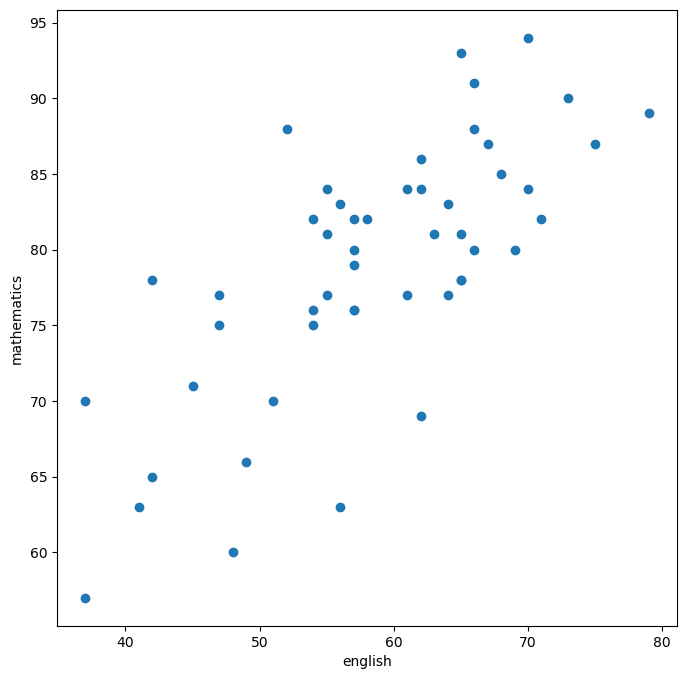

In [ ]:
# 영어 점수와 수학 점수 데이터를 넘파이 배열로 추출
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

# 그래프 객체 생성 및 크기 설정 (8x8)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# 두 점수 간의 관계를 보여주는 산점도 시각화
ax.scatter(english_scores, math_scores)

# 축 레이블 설정
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

# 그래프 출력
plt.show()

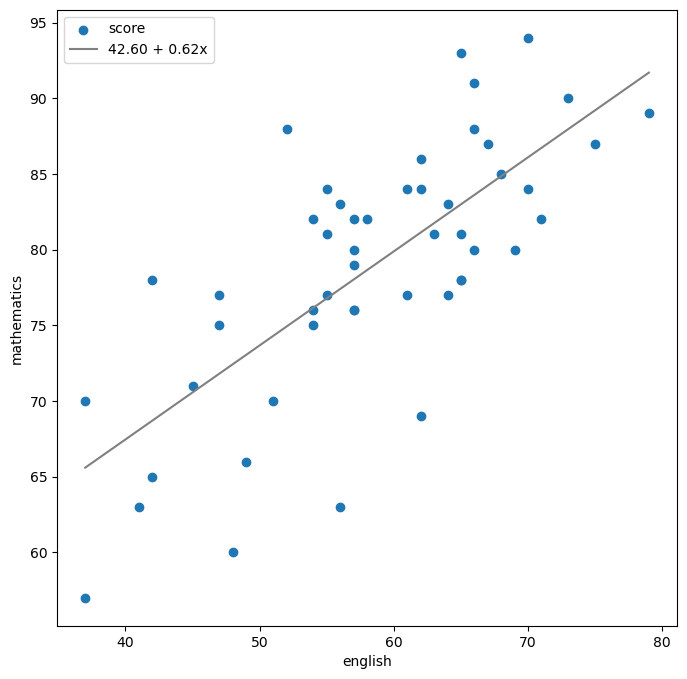

In [24]:
# 회귀직선의 계수 β_1(기울기)과 β_0(절편)를 산출
poly_fit = np.polyfit(english_scores, math_scores, 1)

# 산출된 계수를 사용하여 1차 함수 f(x) = β_0 + β_1x 생성
poly_1d = np.poly1d(poly_fit)

# 회귀직선을 그리기 위한 x축 데이터 생성 (영어 점수의 최솟값부터 최댓값까지)
xs = np.linspace(english_scores.min(), english_scores.max())

# 생성된 x축 데이터에 대응하는 회귀직선의 y축(수학 점수) 데이터 계산
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

# 실제 데이터의 산점도 시각화
ax.scatter(english_scores, math_scores, label='score')

# 계산된 회귀직선 시각화 (레이블에 회귀식 포함)
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x')

# 범례 표시 및 그래프 출력
ax.legend(loc='upper left')
plt.show()

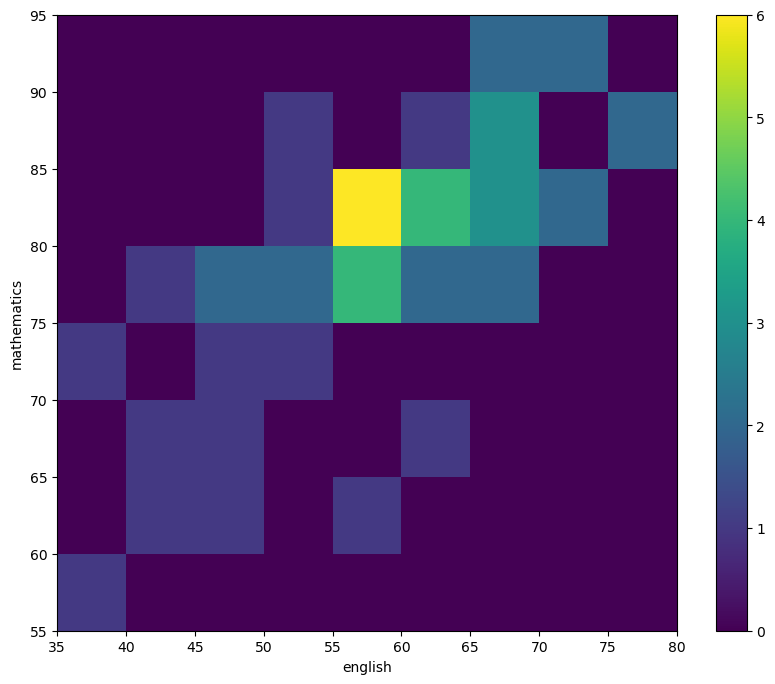

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
# bins=[9, 8]: x축(영어)을 9개, y축(수학)을 8개 구간으로 나누어 빈도를 계산
# range=[(35, 80), (55, 95)]: x축(영어)의 범위를 35~80, y축(수학)의 범위를 55~95로 설정
# 2차원 히스토그램 그리기
c = ax.hist2d(english_scores, math_scores, bins=[9, 8], range=[(35, 80), (55, 95)])

# 축 레이블 설정
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

# 히스토그램의 빈(bin) 경계값을 기반으로 축 눈금 설정
ax.set_xticks(c[1])
ax.set_yticks(c[2])

# 컬러 바 표시
fig.colorbar(c[3], ax=ax)

plt.show()

In [27]:
import seaborn as sns
import numpy as np

# seaborn 라이브러리에서 제공하는 anscombe 데이터셋 로드
df = sns.load_dataset('anscombe')

# 데이터를 (4, 11, 2) 형태의 NumPy array로 변환 (I, II, III, IV 데이터셋 순서)
anscombe_data = np.array([df[df['dataset'] == i][['x', 'y']].values for i in ['I', 'II', 'III', 'IV']])

print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [ ]:
# 각 데이터셋의 통계 지표를 저장할 DataFrame 생성
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
    'Y_variance', 'X&Y_correlation',
    'X&Y_regression line'])

# 앤스컴 데이터셋(anscombe_data)을 순회하며 통계량 산출
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    
    # 1차 선형 회귀 계수(기울기와 절편) 계산
    poly_fit = np.polyfit(dataX, dataY, 1)
    
    # 각 통계 지표를 계산하여 DataFrame의 컬럼으로 추가 (소수점 2자리 포맷팅)
    stats_df[f'data{i+1}'] =\
    [f'{np.mean(dataX):.2f}',                  # X의 평균
    f'{np.var(dataX):.2f}',                    # X의 분산
    f'{np.mean(dataY):.2f}',                  # Y의 평균
    f'{np.var(dataY):.2f}',                    # Y의 분산
    f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',  # X와 Y의 상관계수
    f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']  # 회귀 직선 방정식

stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


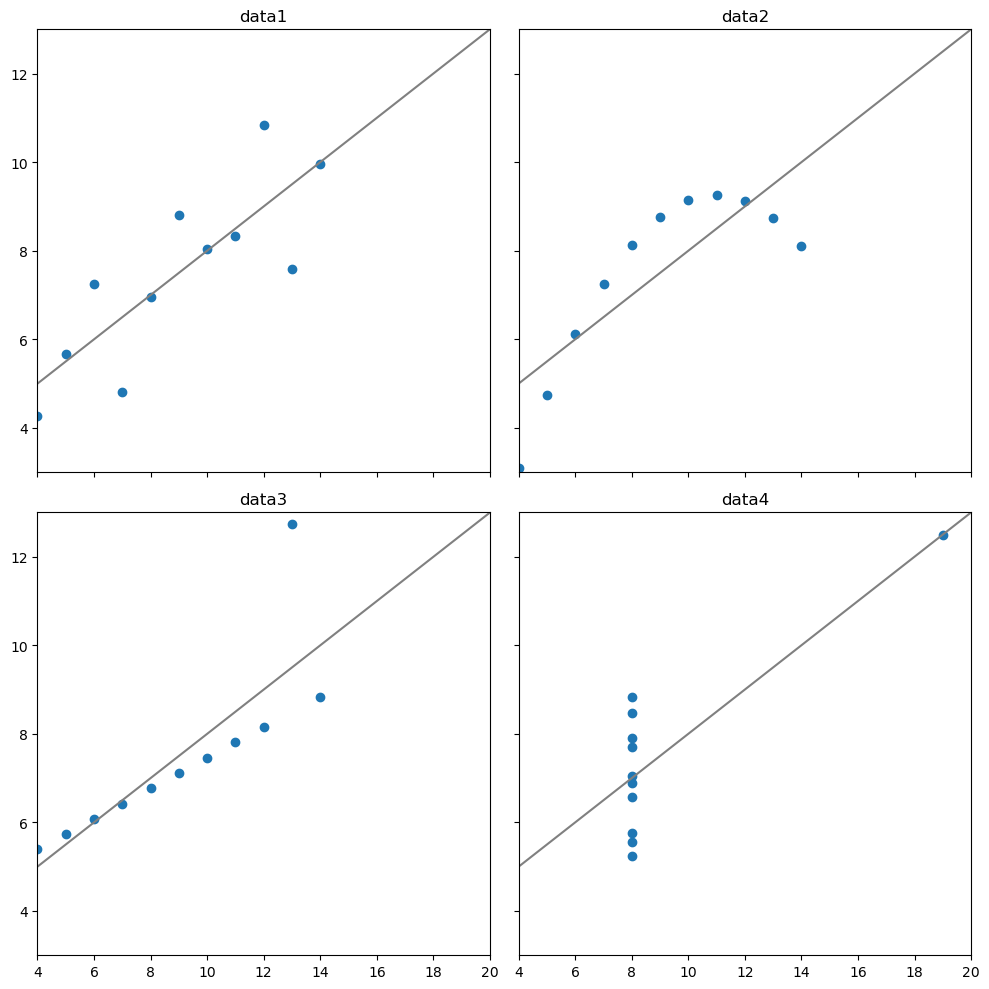

In [29]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True, sharey=True)
xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # 타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')
# 그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()

/var/folders/7l/yp5d25zx7nb_92wbp8w2b0dw0000gn/T/ipykernel_71612/3190939689.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = df.groupby('dataset').apply(lambda g: g['x'].corr(g['y']))


--- 기초 통계량 (Dataset별) ---
            x            y      
         mean    var  mean   var
dataset                         
I       9.000 11.000 7.501 4.127
II      9.000 11.000 7.501 4.128
III     9.000 11.000 7.500 4.123
IV      9.000 11.000 7.501 4.123

--- 상관계수 (Dataset별) ---
dataset
I     0.816
II    0.816
III   0.816
IV    0.817
dtype: float64


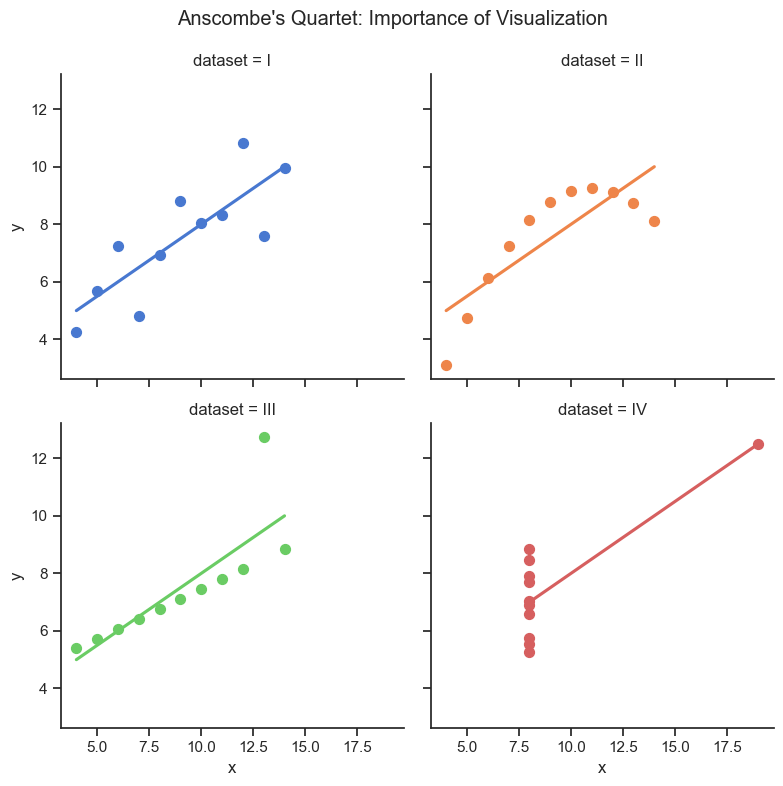

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Anscombe's Quartet 데이터 로드
df = sns.load_dataset("anscombe")

# 1. 기초 통계량 확인 (평균, 분산, 상관계수)
# 네 데이터셋 모두 x, y의 평균, 분산 및 상관계수가 거의 동일함을 확인
stats = df.groupby('dataset').agg(['mean', 'var'])
correlations = df.groupby('dataset').apply(lambda g: g['x'].corr(g['y']))

print("--- 기초 통계량 (Dataset별) ---")
print(stats)
print("\n--- 상관계수 (Dataset별) ---")
print(correlations)

# 2. 시각화를 통한 데이터 분포 확인
sns.set_theme(style="ticks")
g = sns.lmplot(
    data=df, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, ci=None, palette="muted", height=4,
    scatter_kws={"s": 50, "alpha": 1}
)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Anscombe's Quartet: Importance of Visualization")
plt.show()


### 2.3 앤스컴의 콰르텟 (Anscombe's Quartet)
통계 지표(평균, 분산, 상관계수)가 거의 동일함에도 불구하고, 시각화했을 때 전혀 다른 형태를 띠는 네 가지 데이터셋입니다.

**인사이트:**
1. **시각화의 필수성**: 수치 요약 정보만으로는 데이터의 실질적인 패턴이나 구조를 파악하기 어렵습니다.
2. **이상치의 영향**: 특정 데이터셋은 하나의 이상치가 전체 상관계수나 회귀 직선에 큰 영향을 미칠 수 있습니다.
3. **비선형 관계**: 수치적으로는 선형 상관관계가 있는 것처럼 보이나 실제로는 곡선 형태
